In [1]:
from os import path, mkdir, system
import requests
import urllib.request
import IPython.display as Disp

from platform import system as sys
sys = sys()
if sys == 'Darwin':
    from appscript import app, mactypes
else:
    import ctypes

In [2]:
# Save pictures to folder
folder = path.expanduser("~") + "/Downloads/Bing/"

print(folder)

/Users/splch/Downloads/Bing/


http://www.bing.com//th?id=OHR.IsolaBella_EN-US6478889007_1920x1080.jpg&rf=LaDigue_1920x1080.jpg&pid=hp


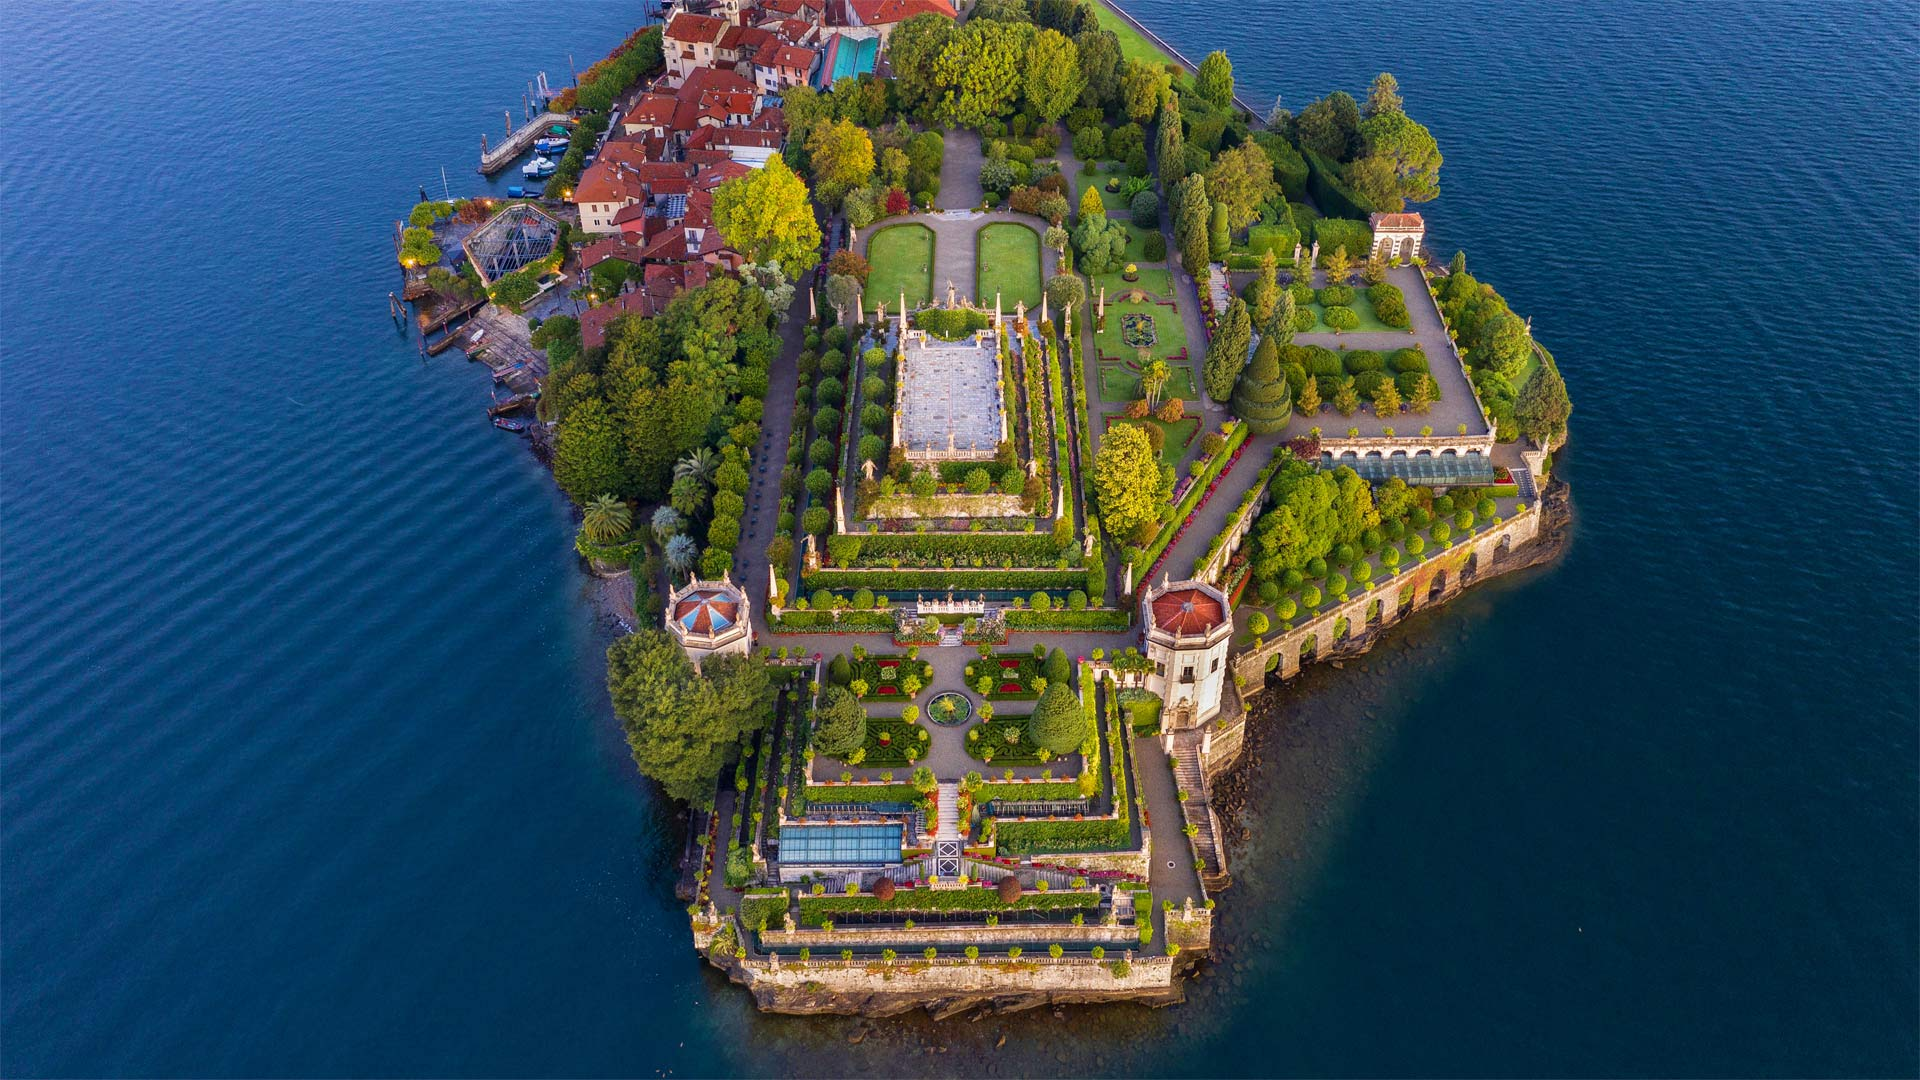

In [3]:
# URL in json format with latest wallpaper
url = "http://www.bing.com/HPImageArchive.aspx?format=js&idx=0&n=1&mkt=en-US"

# Get json output
resp = requests.get(url)
data = resp.json()

# Form image url from json
img = "http://www.bing.com/" + data['images'][0]['url']#.replace("1080", "1200")

print(img)
Disp.Image(requests.get(img).content)

In [4]:
img_path = folder+'daily_wallpaper'+img[-11:-7]
run = path.exists(folder)

if not run:
    mkdir(folder)

urllib.request.urlretrieve(img, img_path)

('/Users/splch/Downloads/Bing/daily_wallpaper.jpg',
 <http.client.HTTPMessage at 0x7fcb9af048b0>)

In [5]:
if sys == 'Darwin':
    system('osascript -e \'tell application "Finder" to set desktop picture to "'+img_path+'" as POSIX file\'')
else:
    ctypes.windll.user32.SystemParametersInfoA(20, 0, img_path , 0)

In [6]:
if not run:
    # system('crontab -l | { cat; echo "0 */2 * * * cd ~/Downloads && ~/opt/miniconda3/bin/python wallpaper.py >> ~/Downloads/cron.log 2>&1"; } | crontab -')
    print('Run python file, not notebook.')

Run python file, not notebook.
